In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


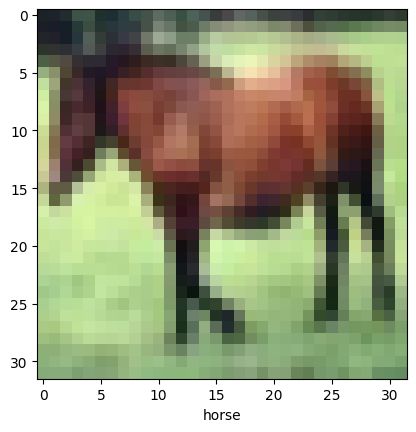

In [3]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**Building the CNN Base Layer**

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

**Build the Dense and Output Layers for our classfication**

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Training**

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 62s 39ms/step - loss: 0.5254 - accuracy: 0.8155 - val_loss: 0.9167 - val_accuracy: 0.7053
Epoch 2/4
1563/1563 [==============================] - 68s 44ms/step - loss: 0.4931 - accuracy: 0.8257 - val_loss: 0.9632 - val_accuracy: 0.7110
Epoch 3/4
1563/1563 [==============================] - 62s 39ms/step - loss: 0.4665 - accuracy: 0.8334 - val_loss: 0.9807 - val_accuracy: 0.7026
Epoch 4/4
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4451 - accuracy: 0.8424 - val_loss: 1.0014 - val_accuracy: 0.7024


**Evaluate**

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


313/313 - 4s - loss: 1.0014 - accuracy: 0.7024 - 4s/epoch - 13ms/step
0.7024000287055969


**Model has a accuracy of 70% with just 4 epochs**

**Prediction**


In [15]:
predictions=model.predict(test_images)

313/313 [==============================] - 3s 11ms/step


In [27]:
predictions[4]

array([-3.9391053 , -5.998784  ,  1.4875671 ,  1.1272944 ,  7.8218985 ,
        0.23423404,  6.3754444 , -7.6752276 , -5.7944016 , -4.1919346 ],
      dtype=float32)

Number of the image to be predicted from the test data:50


<ipython-input-35-a72ed9e76926>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual=int(test_labels[num])


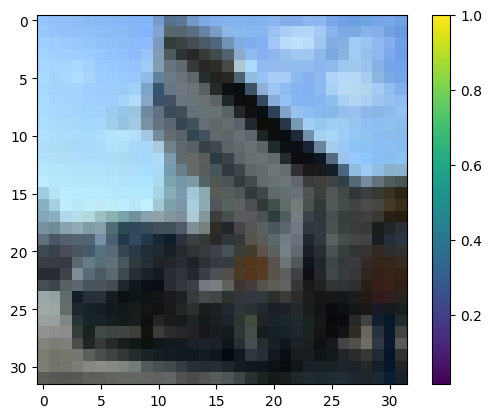

Predicted class: truck    Actual class label: truck


In [35]:
num=int(input("Number of the image to be predicted from the test data:"))

pre=np.argmax(predictions[num])
actual=int(test_labels[num])
plt.figure()
plt.imshow(test_images[num])
plt.colorbar()
plt.grid(False)
plt.show()

print("Predicted class:",class_names[pre],"   Actual class label:",class_names[actual])